## Chapter 10 – Introduction to Artificial Neural Networks with Keras
updated on 2023-01-14

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

print(pd.__version__)

1.3.5


In [2]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

2023-01-14 18:27:44.648950: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

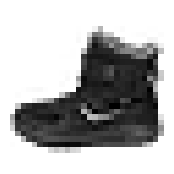

In [4]:
plt.figure(figsize = (2,2))
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

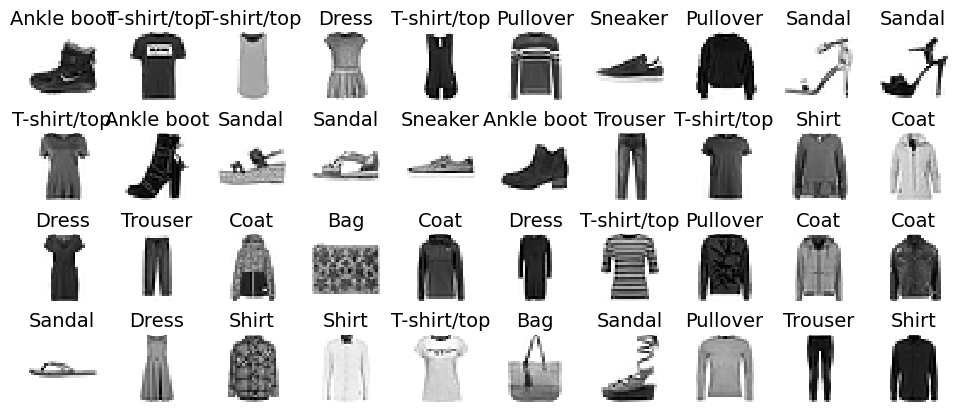

In [6]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [20]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


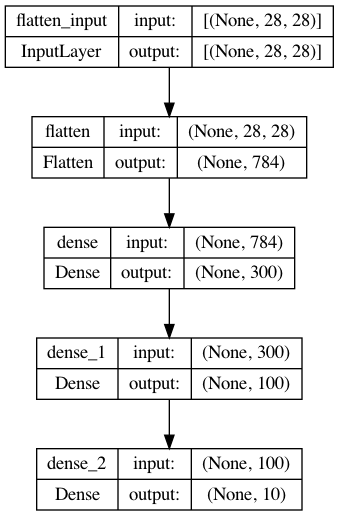

In [9]:
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [23]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7173 - accuracy: 0.7617 - val_loss: 0.5020 - val_accuracy: 0.8298
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4849 - accuracy: 0.8311 - val_loss: 0.4576 - val_accuracy: 0.8370
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4387 - accuracy: 0.8451 - val_loss: 0.4222 - val_accuracy: 0.8518
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4140 - accuracy: 0.8545 - val_loss: 0.3965 - val_accuracy: 0.8600
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3933 - accuracy: 0.8613 - val_loss: 0.3925 - val_accuracy: 0.8614
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3770 - accuracy: 0.8675 - val_loss: 0.3947 - val_accuracy: 0.8628
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3650 - accuracy: 0.8704 - val_loss: 0.3719 - val_accuracy:

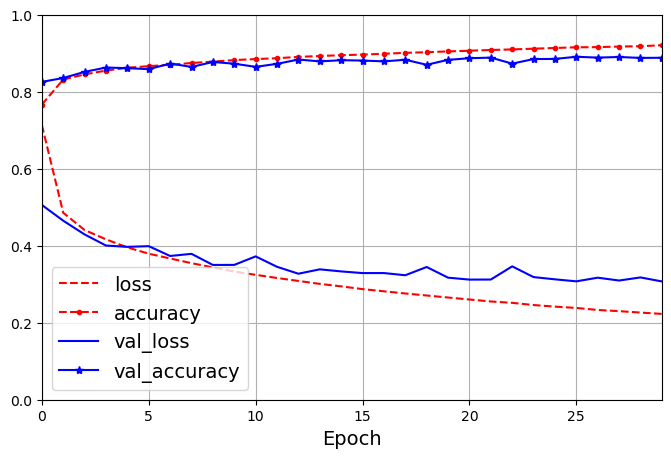

In [12]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel='Epoch',
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 979us/step - loss: 0.3235 - accuracy: 0.8866


[0.32349422574043274, 0.8866000175476074]

In [31]:
import shutil

shutil.rmtree("my_keras_model", ignore_errors=True)

In [23]:
model.save("my_keras_model", save_format="tf")

INFO:tensorflow:Assets written to: my_keras_model/assets


INFO:tensorflow:Assets written to: my_keras_model/assets


In [32]:
shutil.rmtree("my_checkpoints", ignore_errors=True) 

In [29]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints",save_weights_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
history = model.fit(X_train,y_train,epochs=50, validation_data=(X_valid, y_valid),callbacks = [checkpoint_cb,early_stopping_cb])

Epoch 1/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1720 - accuracy: 0.9394 - val_loss: 0.3397 - val_accuracy: 0.8872
Epoch 2/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1700 - accuracy: 0.9396 - val_loss: 0.3176 - val_accuracy: 0.8894
Epoch 3/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1656 - accuracy: 0.9415 - val_loss: 0.3219 - val_accuracy: 0.8890
Epoch 4/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1650 - accuracy: 0.9419 - val_loss: 0.3144 - val_accuracy: 0.8902
Epoch 5/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1628 - accuracy: 0.9416 - val_loss: 0.3191 - val_accuracy: 0.8910
Epoch 6/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1590 - accuracy: 0.9441 - val_loss: 0.3385 - val_accuracy: 0.8858
Epoch 7/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1569 - accuracy: 0.9444 - val_loss: 0.3325 - val_accuracy:

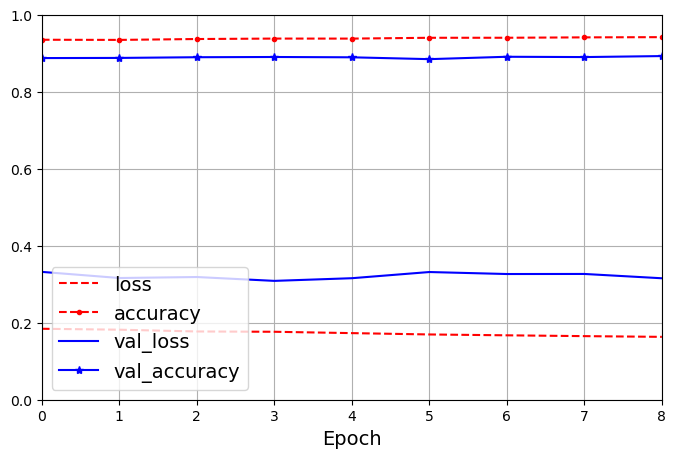

In [28]:
pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=[0, 8], ylim=[0, 1], grid=True, xlabel='Epoch', style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

In [35]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()
run_logdir

PosixPath('my_logs/run_2023_01_14_19_53_44')

In [34]:
shutil.rmtree("my_logs", ignore_errors=True)

In [36]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/20
   1/1719 [..............................] - ETA: 31s - loss: 0.0800 - accuracy: 0.9688

2023-01-14 19:53:54.622780: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-01-14 19:53:54.622807: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-01-14 19:53:54.624776: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.


 200/1719 [==>...........................] - ETA: 2s - loss: 0.1549 - accuracy: 0.9486

2023-01-14 19:53:54.970412: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-01-14 19:53:54.970427: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-01-14 19:53:55.118113: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2023-01-14 19:53:55.135779: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-01-14 19:53:55.141120: I tensorflow/core/profiler/rpc/client/save_profile.cc:164] Collecting XSpace to repository: my_logs/run_2023_01_14_19_53_44/plugins/profile/2023_01_14_19_53_55/Chenxus-MBP.lan.xplane.pb


1719/1719 [==============================] - 3s 2ms/step - loss: 0.1609 - accuracy: 0.9439 - val_loss: 0.3425 - val_accuracy: 0.8878
Epoch 2/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1588 - accuracy: 0.9439 - val_loss: 0.3215 - val_accuracy: 0.8894
Epoch 3/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1545 - accuracy: 0.9459 - val_loss: 0.3242 - val_accuracy: 0.8896
Epoch 4/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1542 - accuracy: 0.9463 - val_loss: 0.3179 - val_accuracy: 0.8900
Epoch 5/20
1719/1719 [==============================] - 3s 1ms/step - loss: 0.1527 - accuracy: 0.9457 - val_loss: 0.3211 - val_accuracy: 0.8912
Epoch 6/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1493 - accuracy: 0.9474 - val_loss: 0.3464 - val_accuracy: 0.8864
Epoch 7/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1471 - accuracy: 0.9482 - val_loss: 0.3396 - val_accuracy: 0.8934
Epo

In [37]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs